Se importa las librerías a utilizar:

In [ ]:
import sqlite3
import pandas as pd

Se descarga la base de datos desde Kaggle utilizando kagglehub en Google Colab:

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atanaskanev/sqlite-sakila-sample-database")

print("Path to dataset files:", path)

100%|██████████| 4.29M/4.29M [00:00<00:00, 6.25MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/atanaskanev/sqlite-sakila-sample-database/versions/1


Verificar los archivos descargados:

In [ ]:
import os

# Lista los archivos descargados
dataset_folder = path  # Usa la variable path que obtuviste antes
print(os.listdir(dataset_folder))


['SQLite3 Sakila Sample Database ERD.png', 'README.txt', 'sqlite-sakila-db', 'sqlite-sakila.db']


Conectarse con la base de datos descargada:

In [ ]:

# Especifica la ruta correcta al archivo .db descargado
db_path = os.path.join(dataset_folder, "sqlite-sakila.db")  # Asegúrate del nombre correcto

# Conectarse a la base de datos
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print("Conectado a la base de datos Sakila 🎉")


Conectado a la base de datos Sakila 🎉


**Listar todas las tablas en la base de datos:**

Se identificó la estructura de la base de datos usando

In [ ]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)


             name
0           actor
1         country
2            city
3         address
4        language
5        category
6        customer
7            film
8      film_actor
9   film_category
10      film_text
11      inventory
12          staff
13          store
14        payment
15         rental


**Películas más Rentadas**

Muestra las 10 películas más alquiladas en la base de datos Sakila.

In [ ]:
query = """
SELECT f.title AS pelicula, COUNT(r.rental_id) AS total_rentas
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.title
ORDER BY total_rentas DESC
LIMIT 10;
"""

df_rentas = pd.read_sql(query, conn)
df_rentas


,pelicula,total_rentas
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,SCALAWAG DUCK,32
3,RIDGEMONT SUBMARINE,32
4,JUGGLER HARDLY,32
5,GRIT CLOCKWORK,32
6,FORWARD TEMPLE,32
7,ZORRO ARK,31
8,WIFE TURN,31
9,TIMBERLAND SKY,31


**Visualización**

<ipython-input-27-266f2c742021>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rentas["total_rentas"], y=df_rentas["pelicula"], palette="coolwarm")


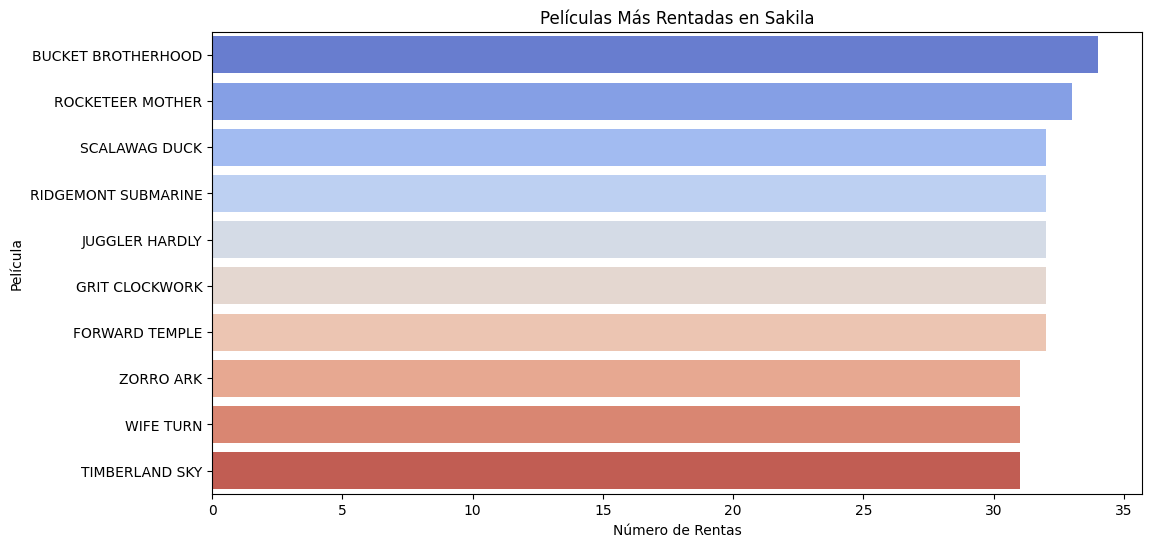

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=df_rentas["total_rentas"], y=df_rentas["pelicula"], palette="coolwarm")
plt.xlabel("Número de Rentas")
plt.ylabel("Película")
plt.title("Películas más Rentadas en Sakila")
plt.show()


**Conclusión:** La película  más rentada en Sakila es Bucket Brotherhood. Le sigue Rocketeer Mother y Scalawag Duck.

**Clientes Más Activos**
Lista los 10 clientes que más rentas han realizado.

In [ ]:
query = """
SELECT c.first_name, c.last_name, COUNT(r.rental_id) AS total_rentas
FROM rental r
JOIN customer c ON r.customer_id = c.customer_id
GROUP BY c.customer_id
ORDER BY total_rentas DESC
LIMIT 10;
"""

df_clientes = pd.read_sql(query, conn)
df_clientes


,first_name,last_name,total_rentas
0,ELEANOR,HUNT,46
1,KARL,SEAL,45
2,CLARA,SHAW,42
3,MARCIA,DEAN,42
4,TAMMY,SANDERS,41
5,SUE,PETERS,40
6,WESLEY,BULL,40
7,RHONDA,KENNEDY,39
8,MARION,SNYDER,39
9,TIM,CARY,39


**Visualización**

<ipython-input-26-803300e484ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clientes["total_rentas"], y=df_clientes["first_name"] + " " + df_clientes["last_name"], palette="viridis")


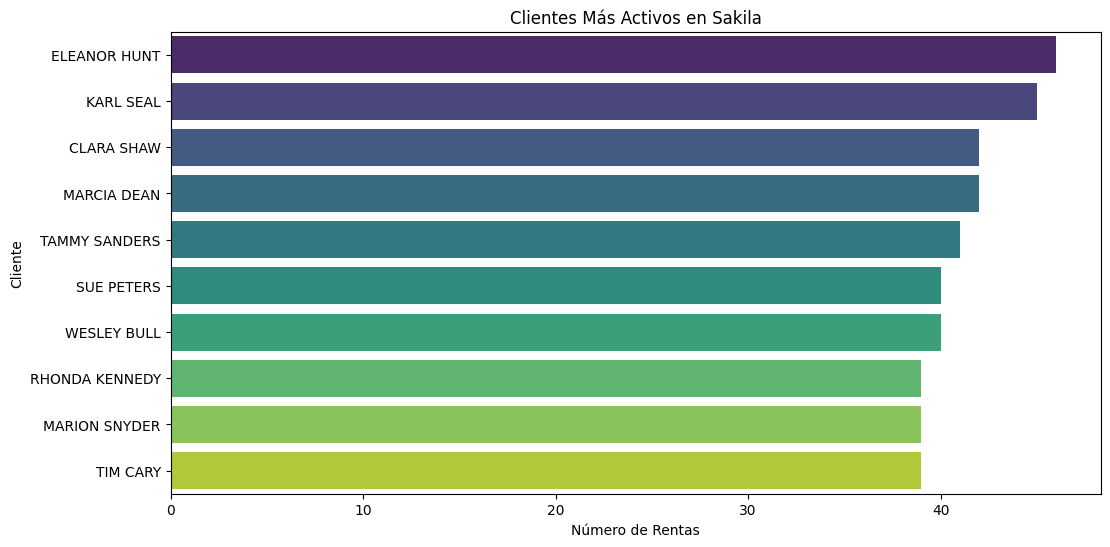

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_clientes["total_rentas"], y=df_clientes["first_name"] + " " + df_clientes["last_name"], palette="viridis")
plt.xlabel("Número de Rentas")
plt.ylabel("Cliente")
plt.title("Clientes Más Activos en Sakila")
plt.show()


**Conclusión:** El cliente más activo en Sakila es Eleanor Hunt. Le sigue Karl Seal y Clara Shaw.

**Género de Películas con más Ingresos**

Consulta que muestra los géneros con mayores ingresos totales.

In [ ]:
query = """
SELECT c.name AS genero, SUM(p.amount) AS total_ingresos
FROM payment p
JOIN rental r ON p.rental_id = r.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY total_ingresos DESC;
"""

df_genero = pd.read_sql(query, conn)
df_genero


,genero,total_ingresos
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


**Visualización**

<ipython-input-21-be1bf6b03a5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genero["total_ingresos"], y=df_genero["genero"], palette="mako")


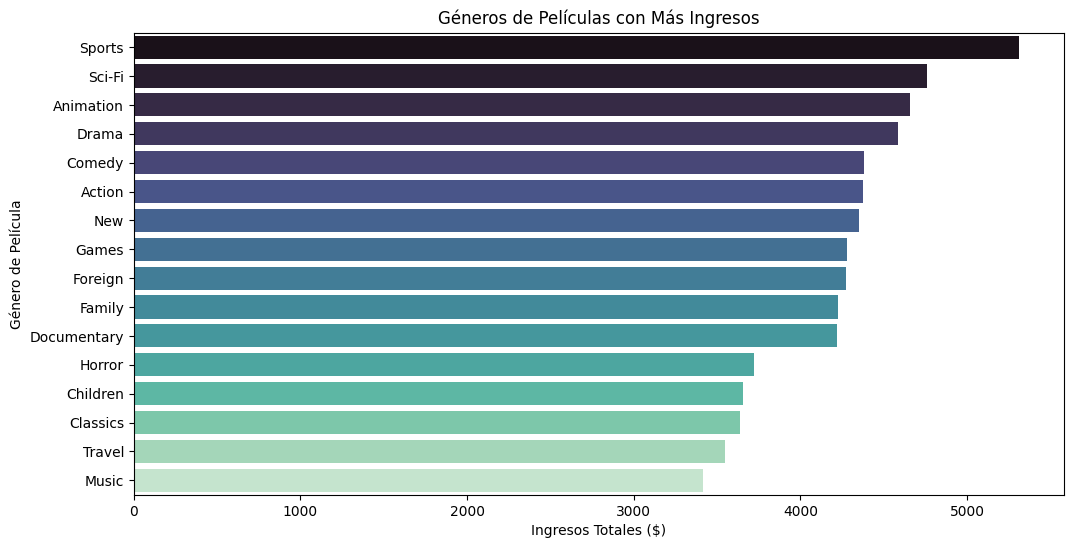

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_genero["total_ingresos"], y=df_genero["genero"], palette="mako")
plt.xlabel("Ingresos Totales ($)")
plt.ylabel("Género de Película")
plt.title("Géneros de Películas con más Ingresos")
plt.show()

**Conclusión:** El género de películas con más ingresos es Sport. Le sigue Sci-Fi y Animation.

**Ingresos Mensuales de la Tienda**

Muestra los ingresos totales por mes.

In [ ]:
query = """
SELECT STRFTIME('%Y-%m', payment_date) AS mes, SUM(amount) AS total_ingresos
FROM payment
GROUP BY mes
ORDER BY mes;
"""

df_ingresos = pd.read_sql(query, conn)
df_ingresos


,mes,total_ingresos
0,2005-05,4824.43
1,2005-06,9631.88
2,2005-07,28373.89
3,2005-08,24072.13
4,2006-02,514.18


**Visualización**

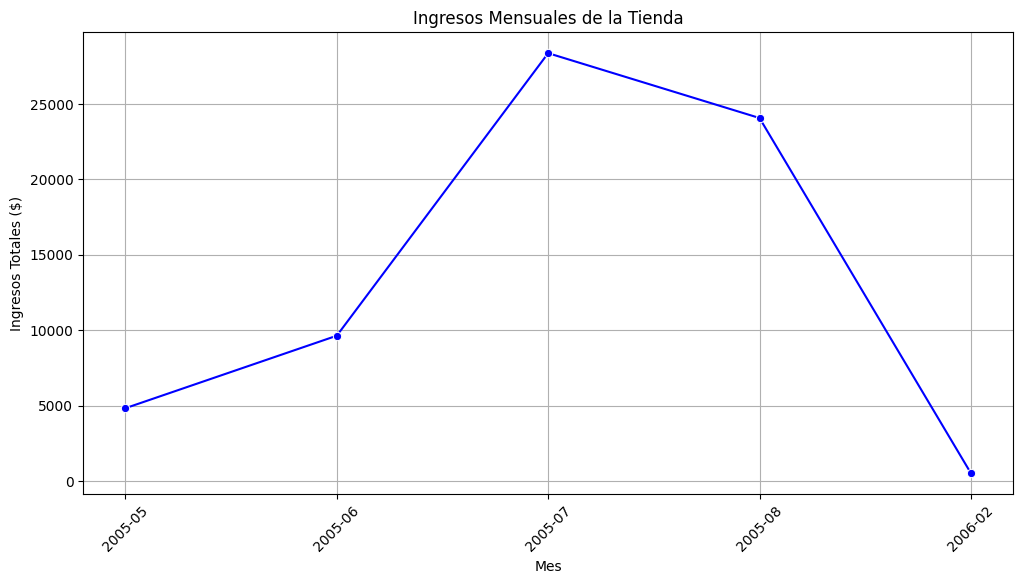

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_ingresos["mes"], y=df_ingresos["total_ingresos"], marker="o", color="b", linestyle="-")
plt.xlabel("Mes")
plt.ylabel("Ingresos Totales ($)")
plt.title("Ingresos Mensuales de la Tienda")
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Conclusión:** El mes de julio del año 2005 es el mes con más ingresos totales en la tienda. Le sigue el mes de agosto del mismo año.